In [1]:
import os
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
# def convert_into_string(df):
#     for col in df.columns:
#         if df[col].dtype =='object':
#             df[col]= df[col].astype('string')
#     return df

In [5]:
string_col = df.select_dtypes(include='object').columns
df[string_col] =df[string_col].astype("string")
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [6]:
# string_col = df.select_dtypes('string').columns.to_list()
# num_col = df.columns.to_list()
# for col in string_col:
#     num_col.remove(col)
# num_col.remove('HeartDisease')
num_col = [x for x in df.columns if x not in string_col]
num_col.remove('HeartDisease')
num_col


['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: >

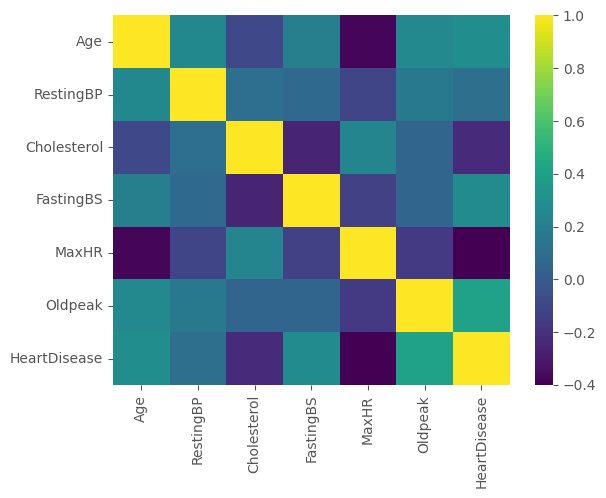

In [8]:
sns.heatmap(df.corr(numeric_only=True),cmap='viridis')

In [9]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


<Axes: >

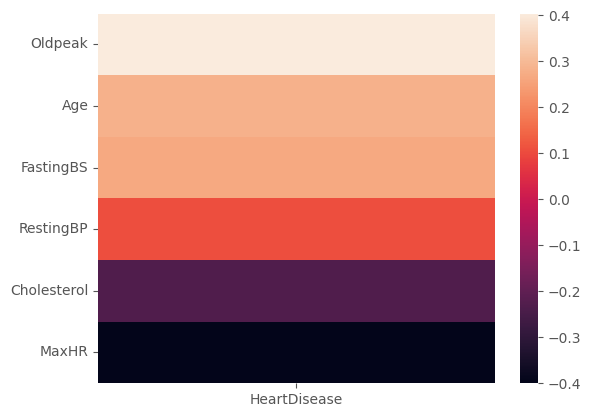

In [10]:
sns.heatmap(df.corr(numeric_only=True)['HeartDisease'].to_frame().drop('HeartDisease').sort_values('HeartDisease',ascending=False))

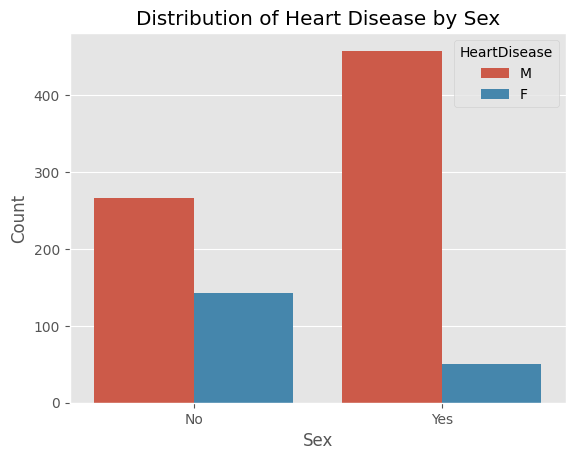

In [11]:
sns.countplot(data=df, x='HeartDisease', hue='Sex')
plt.title('Distribution of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['M', 'F'])
plt.xticks([0,1],['No','Yes'])
plt.show()

In [12]:

px.histogram(df,x='ChestPainType',color='HeartDisease',hover_data=df.columns,title='Types of Chest Pains')


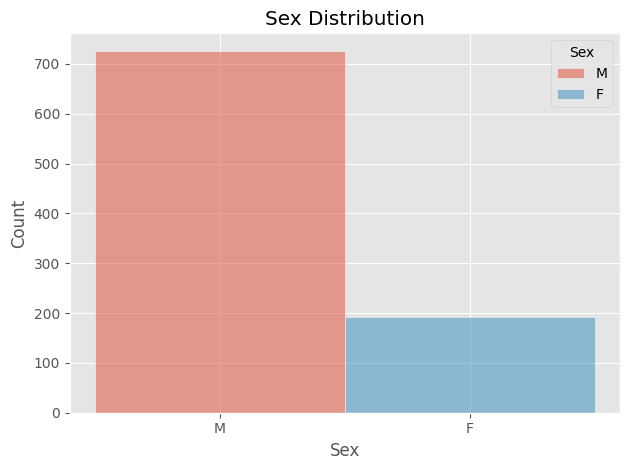

In [13]:

sns.histplot(df,x='Sex',hue='Sex')
plt.title('Sex Distribution')
plt.tight_layout()

<Axes: xlabel='RestingECG', ylabel='Count'>

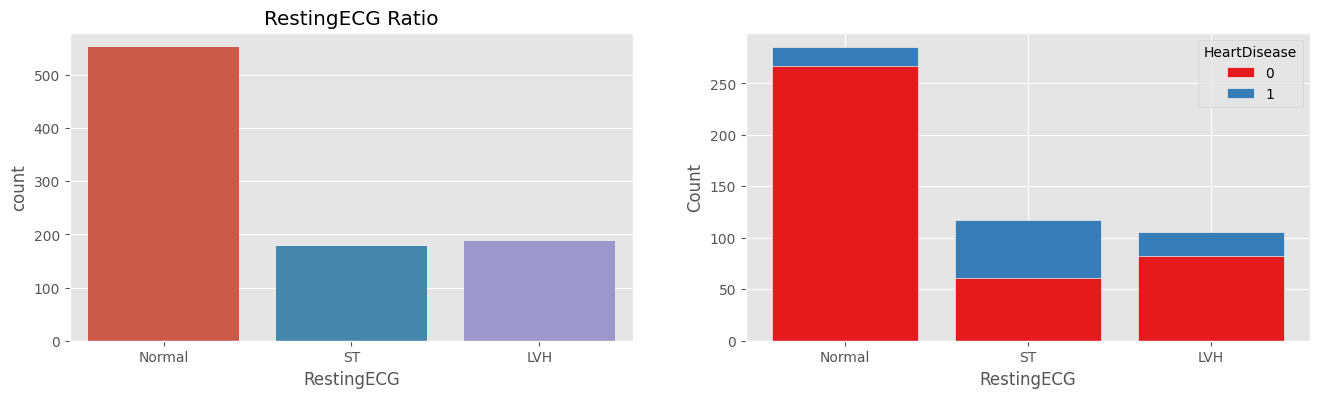

In [14]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(df,x='RestingECG',hue='RestingECG')
plt.title('RestingECG Ratio')
plt.subplot(1,2,2)
sns.histplot(df,x='RestingECG',hue='HeartDisease',shrink=.8,palette='Set1',alpha=None)

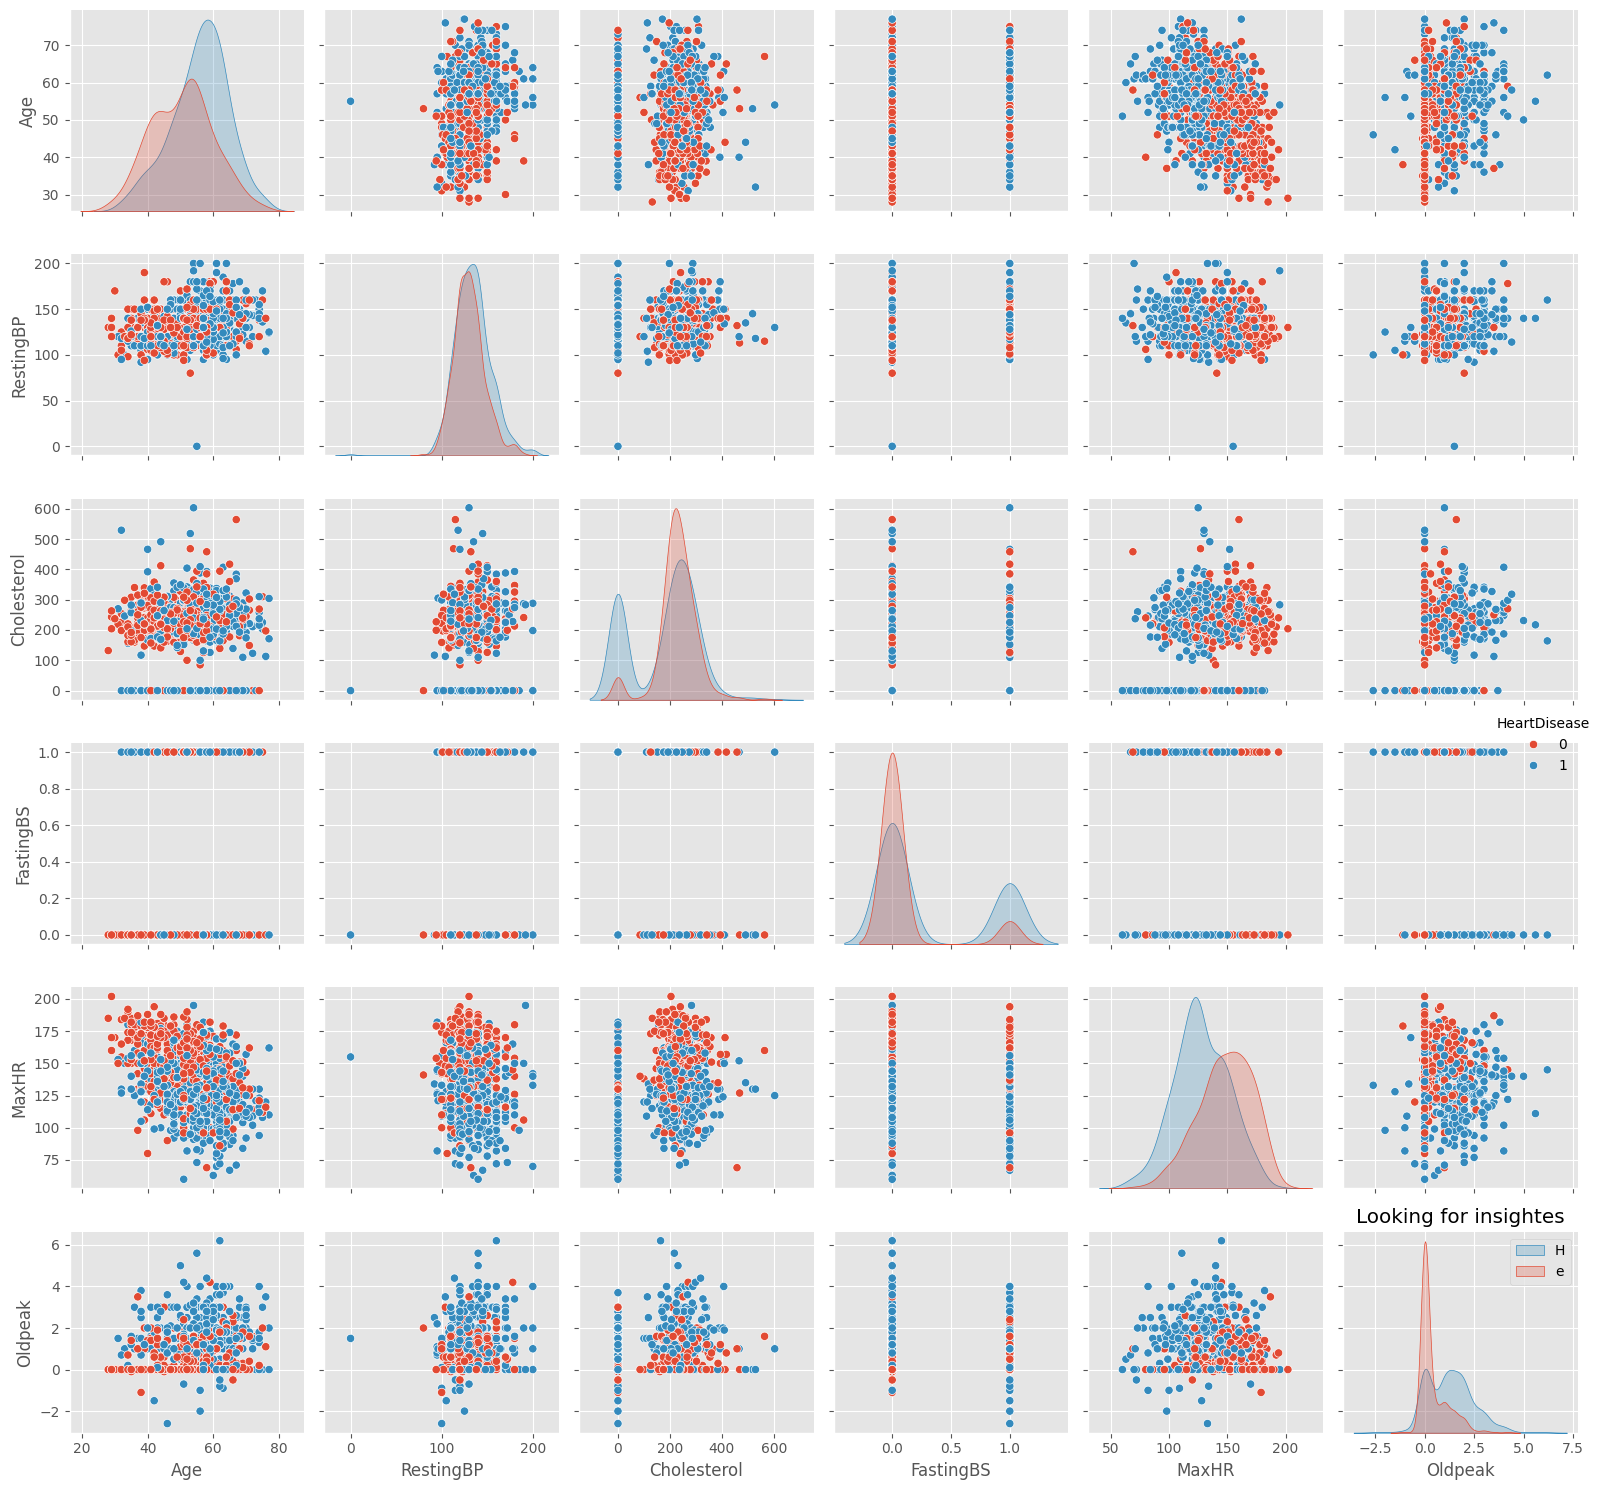

In [15]:
sns.pairplot(df,hue='HeartDisease')
plt.title('Looking for insightes')
plt.legend('Heart Disease')
plt.tight_layout()

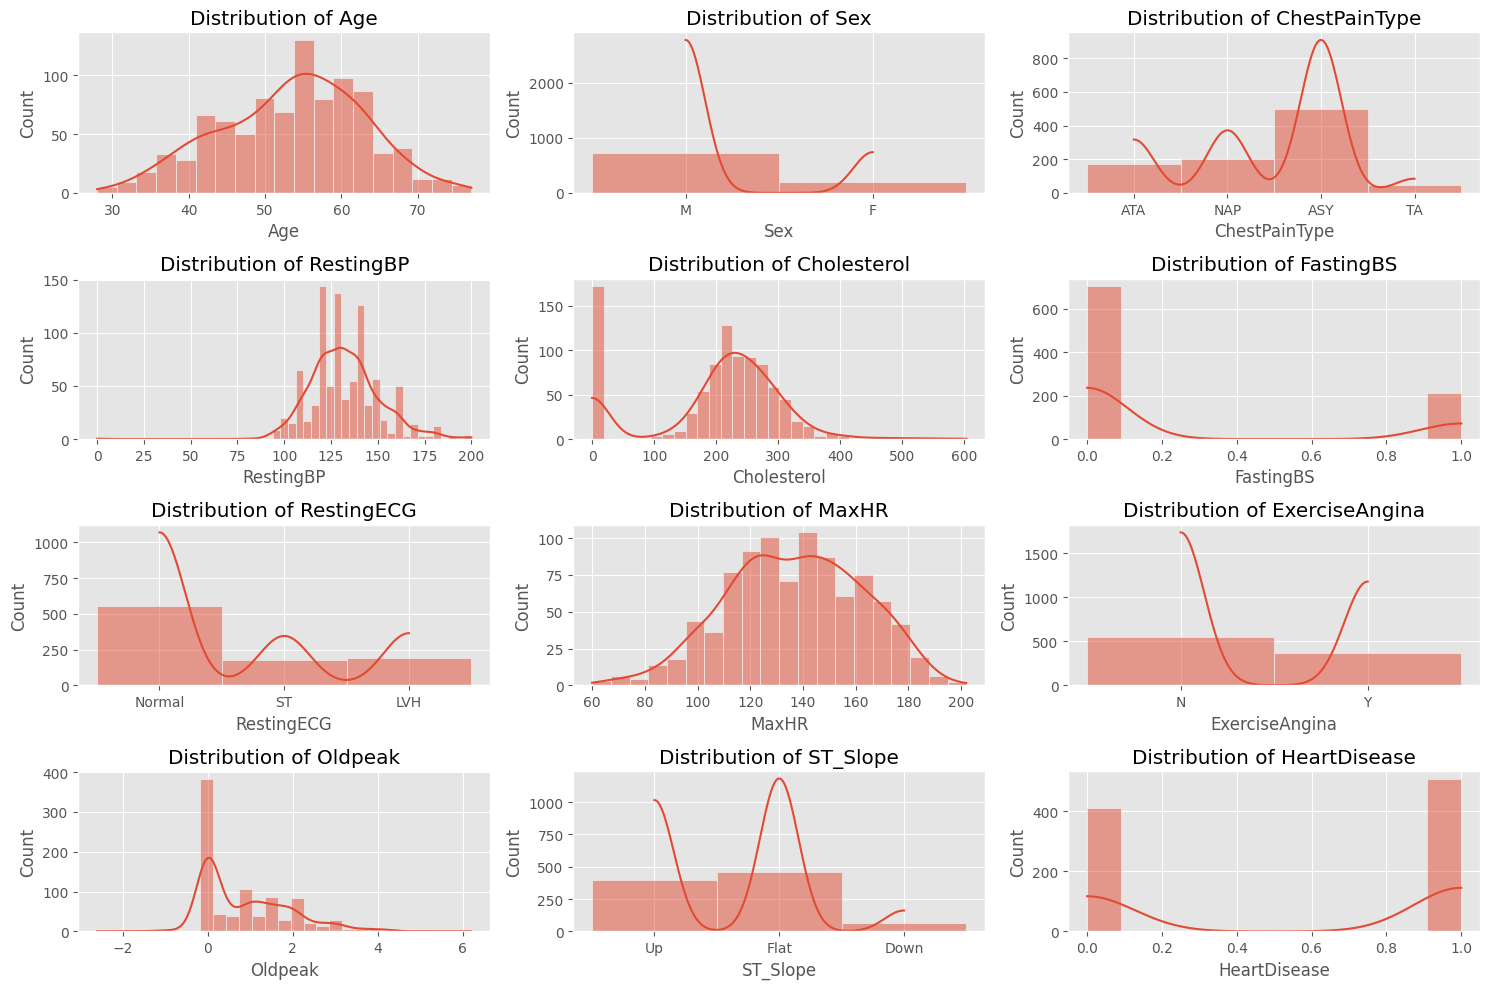

In [16]:

df.columns.value_counts().sum()
plt.figure(figsize=(15,10))
for i ,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    
    plt.plot()

Text(0.5, 1.0, 'Age Dist')

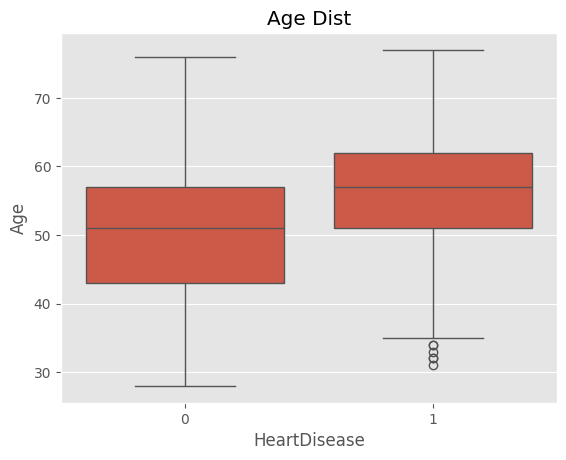

In [17]:
sns.boxplot(df,y='Age',x='HeartDisease')
plt.title('Age Dist')

In [18]:
chart =px.box(df,x='HeartDisease',y='RestingBP',color='Sex',title='Distribution of restingBP vs Sex')
chart.show()

In [19]:
px.box(df,x='HeartDisease',y='Cholesterol',title='Dist of Cholesterol')

In [20]:
px.box(df,x='HeartDisease',y='Oldpeak',title='Dist of Oldpeak')

In [21]:
px.box(df,x='HeartDisease',y='MaxHR')

In [22]:
# in case of missing values # Impute approach filling NaN with means

# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
# imputer = imputer.fit(df['Weight'])
# df['Weight'].transform(df['Weight'])

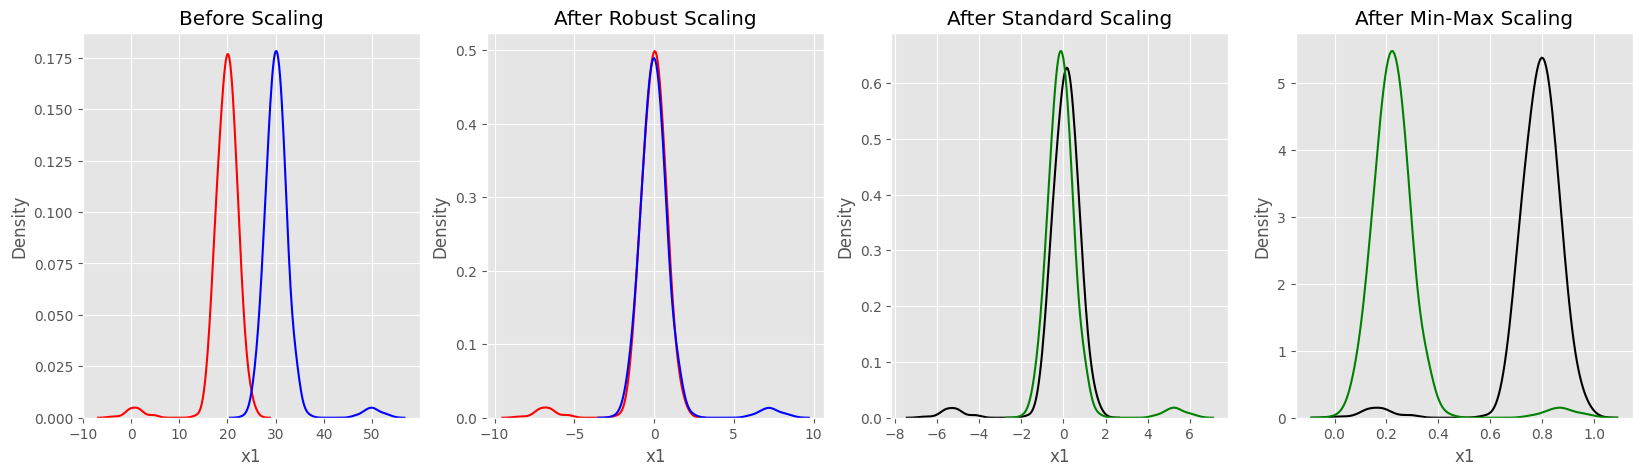

In [56]:
x = pd.DataFrame ({
    'x1' : np.concatenate([np.random.normal(20,2,1000),np.random.normal(1,2,25)]),
    'x2': np.concatenate([np.random.normal(30,2,1000),np.random.normal(50,2,25)])
})

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df,columns=['x1','x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [63]:
df[string_col].head()
for c in string_col:
    print(f'Distribution of cat values in {c} is:')
    print(df[c].value_counts())

Distribution of cat values in Sex is:
Sex
M    725
F    193
Name: count, dtype: Int64
Distribution of cat values in ChestPainType is:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
Distribution of cat values in RestingECG is:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
Distribution of cat values in ExerciseAngina is:
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
Distribution of cat values in ST_Slope is:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [65]:
df_tree =df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [78]:
df_nontree = pd.get_dummies(df,columns=string_col,drop_first=False).astype(int)
df_nontree.head()
target='HeartDisease'
y= df_nontree[target].values
df_nontree.drop('HeartDisease',axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
